# Building linear regression model from **sklearn** for predicting next year's GDP per capita.

Data downloaded from: https://ourworldindata.org/grapher/gdp-per-capita-penn-world-table

In [ ]:
#import numpy
import numpy as np

# prompt: add data from drive

from google.colab import drive
drive.mount('/content/drive')

# Access files from your Google Drive
data_path = '/content/drive/MyDrive/GDP.csv'

# Read the data using pandas
import pandas as pd
data = pd.read_csv(data_path)

# Print the data
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Entity Code  Year  GDP per capita (output, multiple price benchmarks)
0       Albania  ALB  1971                                          3159.8088 
1       Albania  ALB  1972                                          3214.6665 
2       Albania  ALB  1973                                          3267.8481 
3       Albania  ALB  1974                                          3330.0708 
4       Albania  ALB  1975                                          3385.2730 
...         ...  ...   ...                                                ... 
10103  Zimbabwe  ZWE  2015                                          2880.9058 
10104  Zimbabwe  ZWE  2016                                          2919.6170 
10105  Zimbabwe  ZWE  2017                                          3112.8750 
10106  Zimbabwe  ZWE  2018                                          3007.2370 
10

# Exploring and wrangling data

In [ ]:
# columns
data = data[data.Entity == 'Pakistan']
data.rename(columns={"GDP per capita (output, multiple price benchmarks)": "GDP"}, inplace=True)

<ipython-input-73-5956bd258ef0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"GDP per capita (output, multiple price benchmarks)": "GDP"}, inplace=True)


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Get descriptive statistics of the data
descriptive_stats = data.describe()
print("\nDescriptive statistics:\n", descriptive_stats)

Missing values:
 Entity    0
Code      0
Year      0
GDP       0
dtype: int64

Descriptive statistics:
               Year          GDP
count    70.000000    70.000000
mean   1984.500000  2599.001620
std      20.351085  1072.901814
min    1950.000000  1271.020600
25%    1967.250000  1733.271325
50%    1984.500000  2524.832200
75%    2001.750000  2898.735175
max    2019.000000  5026.208500


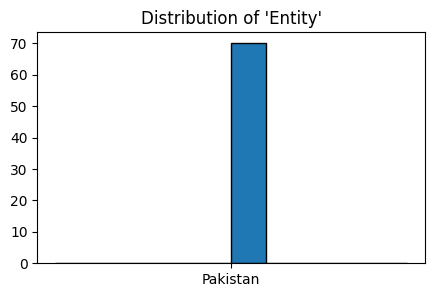

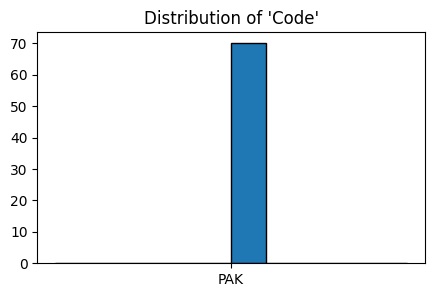

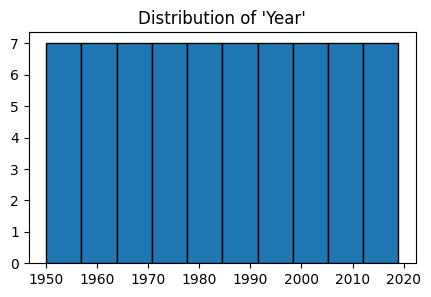

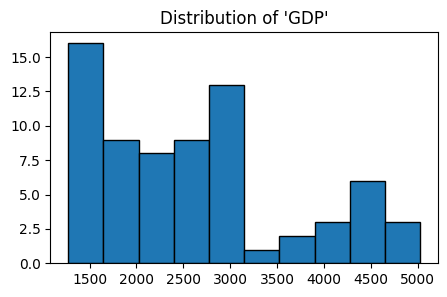

In [ ]:
# Analyze the distribution of each column
for column in data:
  plt.figure(figsize=(5, 3))
  plt.hist(data[column], bins=10, edgecolor='black')
  plt.title(f"Distribution of '{column}'")
  plt.show()



In [ ]:
# Calculate correlation between columns
correlations = data.corr()
print("\nCorrelations:\n", correlations)


Correlations:
           Year       GDP
Year  1.000000  0.959331
GDP   0.959331  1.000000


<ipython-input-76-7983f8c8eba6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


# Using a simple regression model

In [ ]:
# Data
X = data[["Year"]] # X must be 2D for scikit.
y = data[["GDP"]]

In [ ]:
# Importing model.
from sklearn.linear_model import LinearRegression

# Instantiating the model.
regression = LinearRegression()

# Fitting model.
regression.fit(X, y)

# Getting predictions.
predictions = regression.predict(X)
print(predictions)


[[ 854.14436286]
 [ 904.71993553]
 [ 955.2955082 ]
 [1005.87108087]
 [1056.44665354]
 [1107.02222621]
 [1157.59779888]
 [1208.17337155]
 [1258.74894422]
 [1309.32451689]
 [1359.90008957]
 [1410.47566224]
 [1461.05123491]
 [1511.62680758]
 [1562.20238025]
 [1612.77795292]
 [1663.35352559]
 [1713.92909826]
 [1764.50467093]
 [1815.0802436 ]
 [1865.65581627]
 [1916.23138894]
 [1966.80696161]
 [2017.38253429]
 [2067.95810696]
 [2118.53367963]
 [2169.1092523 ]
 [2219.68482497]
 [2270.26039764]
 [2320.83597031]
 [2371.41154298]
 [2421.98711565]
 [2472.56268832]
 [2523.13826099]
 [2573.71383366]
 [2624.28940634]
 [2674.86497901]
 [2725.44055168]
 [2776.01612435]
 [2826.59169702]
 [2877.16726969]
 [2927.74284236]
 [2978.31841503]
 [3028.8939877 ]
 [3079.46956037]
 [3130.04513304]
 [3180.62070571]
 [3231.19627839]
 [3281.77185106]
 [3332.34742373]
 [3382.9229964 ]
 [3433.49856907]
 [3484.07414174]
 [3534.64971441]
 [3585.22528708]
 [3635.80085975]
 [3686.37643242]
 [3736.95200509]
 [3787.5275777

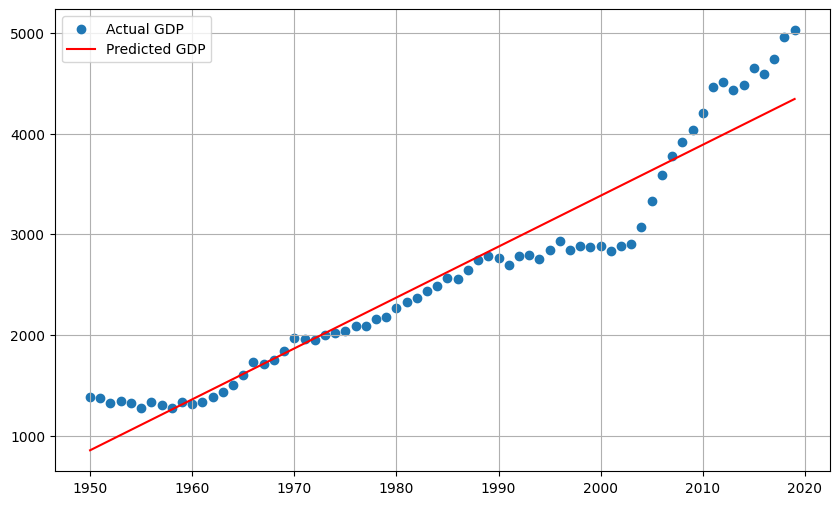

In [ ]:
# Visualizing fitted line.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual GDP')
plt.plot(X, predictions, label='Predicted GDP', color='red')
plt.xlabel = 'Year'
plt.ylabel = 'GDP'
plt.grid(True)
plt.legend()
plt.show()

 # GDP for next year 2020.

In [ ]:
 regression.predict([[2020]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4394.434449813663

# Measuring model performance
Approximately 92% of the variability in GDP can be explained by the model. In other words, the model captures a significant portion of the patterns in the data.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mase = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Root mean square error for GDP is: {mase}")
print(f"r2 for GDP is: {r2}")

Root mean square error for GDP is: 90415.75371707605
r2 for GDP is: 0.920315638441298
